# AVIATION ACCIDENTS TRENDS
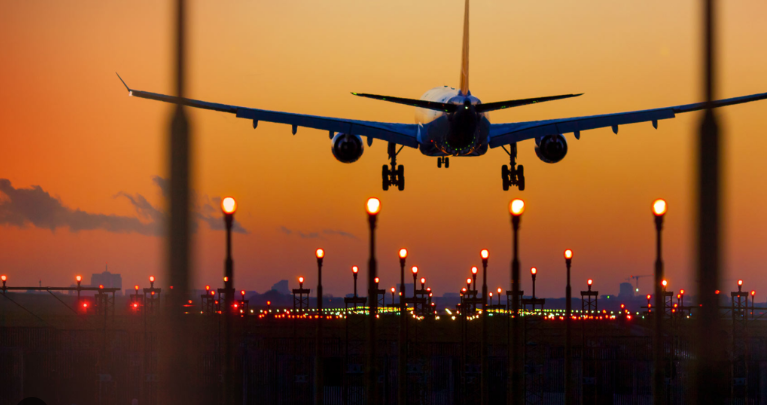

# OVERVIEW
This project analyzes aviation accidents' data from 1980 upto 2022, to study trends of accidents and how it can be used to influence Uzima company's decision in the purchase and operation of aircrafts. Some of the approaches used in this project are borrowed from the [Part 121 Accident Survivability - NTSB](https://www.ntsb.gov/safety/data/Pages/Part121AccidentSurvivability.aspx). I will use data cleaning, imputation, analysis, and visualization to generate insights for the company. 


# BUSINESS PROBLEM
The company can use data from [Aviation Accident Database - Kaggle](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses/data?select=AviationData.csv) to draw actionable insights on which aircrafts to invest and its potential risks. The purpose of this project is to help determine which airplanes are the lowest risk for the company to start this business endeavour. From the data, I was able to pose the following questions to help make the next steps. 

The business questions posed are:
1. What are the accidents trends over the years?
2. What are the potential risks based on accidents and occupants' survivability?
3. What are the risks based on purpose of flight between commercial and private?
 

# DATA UNDERSTANDING 
In the data folder is a dataset from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.
The data we're going to use is contained in the AviationData.csv file; Which has records about the aircraft makes, the accidents' data, injury severity and outcomes etc. that will be used to answer our business questions.

# DATA PREPARATION
## Data loading 

In [ ]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.available
plt.style.use('Solarize_Light2')

In [ ]:
#load the data
aviation_df= pd.read_csv('data/AviationData.csv', encoding= 'latin1', low_memory= False)
aviation_df

In [ ]:
aviation_df.shape

In [ ]:
aviation_df.info()

In [ ]:
aviation_df.columns

The dataframe has 31 columns and 88,889 rows with float and string data types. There are records that have missing values such as F.A.R Description,Air.carrier. Engine type etc. The Event date is also in a string formart instead of datetime. 
These issues will be  handled  based on the columns to be used.

## Perform data cleaning required to answer the first question
The first question: What are the accidents' trends over the years? 

This will help determine frequency of aviation accidents over time and also identify ways to enhance preventive maintenance and safety regulations in place.  


Convert 'Event.Date' values from string to datetime type

In [ ]:
aviation_df['Event.Date']= pd.to_datetime(aviation_df['Event.Date'])
aviation_df['Event.Date']

In [ ]:
#handle missing values 
aviation_df['Event.Date'].isnull().sum()

There are no missing values for the Event Date column. I'll now compare accidents trends with the top 5 most used airlines.

In [ ]:
top5_makes= aviation_df['Make'].value_counts(sort=True).head().index
top5_makes

In [ ]:
filter_df= aviation_df[aviation_df['Make'].isin(top5_makes)]
filter_df

In the time series plot,only  years from 1980 upto 2022 were included since, full narrative descriptions may not be available for dates before 1993, cases under revision, or where NTSB did not have primary investigative responsibility.

The top five airlines boarded was also used to identify which one poses the lowest risk for accidents rates. 

In [ ]:
aviation_df['Event.Date']= pd.to_datetime(aviation_df['Event.Date'])
# count accidents per year
aviation_df['Year'] = aviation_df['Event.Date'].dt.year

# filter for years 1980 and later
years_filtered= aviation_df[aviation_df['Year']>1980]
yearly_counts = years_filtered.groupby('Year').size()

#filter the dataframe to only include the top 5 aircrafts 
filter_df= aviation_df[aviation_df['Make'].isin(top5_makes)] 

#group by year and make, then count accidents 
yearly_counts= filter_df.groupby(['Year', 'Make']).size().unstack()

#plot 
fig,ax= plt.subplots(figsize=(12,10))

#plot accident trends for each of the top 5 aircrafts make
for make in yearly_counts.columns:
    ax.plot(yearly_counts.index, yearly_counts[make], marker='o', linestyle='-', label= make)
    

    
#labels and title 
ax.set_xlabel('Years')
ax.set_ylabel('Number of Accidents')
ax.set_title('AIRCRAFT ACCIDENT TRENDS OVER THE YEARS BY THE TOP AIRCRAFTS')
ax.legend(title= 'Aircraft make'); 
  

From the plot, from 1980 to 2022, there has been a significant reduction in the number of accidents recorded providing an indication of the success of accidents prevention. 

From 1979 to to 1980s, Cessna airlines show a sharp increase followed by a rapid decline in accidents indicating surge in aircraft production, operational issues or changes in reporting mechanisms. 
Cessna and Piper recorded highest accident rates in the early years but reduced significantly later but still remain more frequent than other airlines.

By make, Beech airlines show the lowest records of accidents, with its highest being 250 in 1982 and its lowest being approximately 20 in 2009. 

## Feature engineering to answer second question
The second question; What are the potential risks based on accidents and occupants' survivability?

Based on accident trends over time, we analyze the occupants survivability to find out if most air carrier accidents are survivable.
Analysing occupant survivability helps the company identify things that can be done to increase survivability in the accidents to occur.

To answer this question  all the columns showing injury outcomes and the years to show the distribution over time are used. I already handled the 'Event.Date' column, now  just the injury outcomes columns are handled.


In [ ]:
#create a dataframe to store only the injury outcome columns from the aviation_df dataframe
aviation1= aviation_df.loc[:, ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']]
aviation1


##### Perform data aggregation to visualize the injury outcome trends over the years.

In [ ]:
aviation_df['Event.Date']= pd.to_datetime(aviation_df['Event.Date'])
# Count incidents per year
aviation_df['Year'] = aviation_df['Event.Date'].dt.year
aviation_df= aviation_df[aviation_df['Year']>=1980].copy()

#replace NaN values with 0 for better visualization
outcome_columns= ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
aviation_df[outcome_columns]= aviation_df[outcome_columns].fillna(0)

#aggregate injury outcomes per year
outcome_trends = aviation_df.groupby('Year')[outcome_columns].sum().reset_index()

In [ ]:
# Create Figure and Axes
fig, ax = plt.subplots(figsize=(14, 7))

# Scatter plot for each injury type
sns.scatterplot(data=outcome_trends, x='Year', y='Total.Fatal.Injuries', color='red', label="Fatal Injuries", ax=ax)
sns.scatterplot(data=outcome_trends, x='Year', y='Total.Serious.Injuries', color='orange', label="Serious Injuries", ax=ax)
sns.scatterplot(data=outcome_trends, x='Year', y='Total.Minor.Injuries', color='blue', label="Minor Injuries", ax=ax)
sns.scatterplot(data=outcome_trends, x='Year', y='Total.Uninjured', color='green', label="Uninjured", ax=ax)

#labels and title 
ax.set_xlabel('Years')
ax.set_ylabel('Number of Outcomes')
ax.set_title('OUTCOMES OF INJURY TRENDS OVER THE YEARS')

# Rotate x-axis labels for readability
ax.set_xticks(range(aviation_df['Year'].min(), aviation_df['Year'].max(), 5))
ax.set_xticklabels(ax.get_xticks(), rotation=45);


The Uninjured(green dots) show high variability, with great fluctuations over the years its highest peak being  16,000 in 1988.

The other outcomes; fatal, serious and minor injuries remain steady and relatively low throughout the years with occasional spikes in 1996,2005 and 2014. There is a decline after 2020 indicating enhancement of preventive measures over the years. 

## What are the risks for purchasing either commercial or private airlines based on injury outcomes and  aircraft damage.
The aircrafts are analysed based on purpose of flight to find  one that poses the lowest risk based on accidents occurence.

The 'purpose of flight', 'aircraft damage', 'weather condition' and injury outcome columns will be used to answer this question. Weather condition column is used to gauge which aircraft(private or commercial) handles poor weather best.

In [ ]:
aviation_df['Purpose.of.flight'].value_counts()

Purpose of flight for only the private and commercial airlines with the aircraft damage, weather conditions and injury outcomes are analysed.
Let's start with injury outcomes:

In [ ]:
#create a dataframe, purpose_df, from the aviation dataframe to only include 
#data for the personal and commercial purpose flights.
purpose_df= aviation_df.loc[aviation_df['Purpose.of.flight'].isin(['Personal','Business'])]
purpose_df

In [ ]:
purpose_df.columns

Pivot table- injury outcomes

In [ ]:
outcome_columns= ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
purpose_pivot= purpose_df.groupby('Purpose.of.flight')[outcome_columns].sum()
purpose_pivot

In [ ]:
purpose_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('FLIGHT PURPOSE vs INJURY OUTCOMES (STACKED)', fontsize=16)
plt.xlabel('Purpose of flight', fontsize=12)
plt.ylabel('Injury Outcomes', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Injury Outcomes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout();

Looks like Business flights record a lower count of injury outcomes,9,000, compared to personal flights,97,000, for accident occurences. 
This indicates differences in aircraft capacity in the two types of airlines. The business flights records approximately 1,000 fatal injuries whereas private flights show 19,000 fatal injuries, indicating accidents in private planes are more severe.

Next, purpose of flight with aircraft damages and weather conditions are compared:

In [ ]:
aviation_df['Aircraft.damage']

In [ ]:
#modify the dataframe to only include purpose of flight and aircraft damage columns.
purpose_df= purpose_df[['Purpose.of.flight','Aircraft.damage']]

In [ ]:
#perform data aggregation to visualize relationship
damage_pivot= purpose_df.groupby(['Purpose.of.flight', 'Aircraft.damage']).size().unstack()
damage_pivot_T= damage_pivot.T
damage_pivot_T

In [ ]:
flight_purpose_df= aviation_df.loc[aviation_df['Purpose.of.flight'].isin(['Personal','Business'])]
#modifying the dataframe to only keep rows that have IMC,VMC and unk records for clear and easy to interpret visualization.
flight_purpose_df=flight_purpose_df.loc[(flight_purpose_df['Weather.Condition']!= 'UNK')&(flight_purpose_df['Weather.Condition']!= 'unk')]
weather_pivot= flight_purpose_df.groupby(['Purpose.of.flight','Weather.Condition','Aircraft.damage']).size().unstack()
weather_pivot

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))


# First subplot (FLIGHT PURPOSE vs AIRCRAFT DAMAGE)
damage_pivot_T.plot(kind='bar', stacked=True,ax=ax[0]) #assign to ax[0]
ax[0].set_title('FLIGHT PURPOSE vs AIRCRAFT DAMAGE ', fontsize=16)
ax[0].set_xlabel('Purpose of flight', fontsize=12)
ax[0].set_ylabel('Aircraft Damages', fontsize=12)
ax[0].tick_params(axis= 'x',rotation=45)
ax[0].legend(title='Aircraft Damages', bbox_to_anchor=(1.05, 1), loc='upper left')


#Second subplot (FLIGHT PURPOSE vs WEATHER CONDITION)
weather_pivot.plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('FLIGHT PURPOSE vs WEATHER CONDITION ', fontsize=16)
ax[1].set_xlabel('Purpose of flight', fontsize=12)
ax[1].set_ylabel('Number of damages', fontsize=12)
ax[1].tick_params(axis= 'x',rotation=45)
ax[1].legend(title='Aircraft Damages', bbox_to_anchor=(1.05, 1), loc='upper left')


# Set a common title for all subplots
fig.suptitle('ANALYSIS OF FLIGHT PURPOSE, DAMAGE & WEATHER CONDITION', fontsize=18, fontweight='bold')

# Adjust layout
fig.text(0.5, 0.04, 'damages', ha='center')
plt.tight_layout()
plt.show()

The commercial airplanes also show a lower count of aircraft damages compared to personal airplanes. With personal airplanes recording 42,000 substantial damage and 12,000 destroyed. Whereas commercial airplanes record 3,000 substantial damages and 1,000 destroyed. 

Finally, accidents' severity is analysed by comparing aircraft damage based on the the purpose of flight and weather condition.


VMC (Visual Meteorological Conditions) periods of good visibility, clear skies and minimal cloud cover allow pilots to operate by easily without relying on instruments. It records more substantial damage on personal aircrafts compared to commercial aircrafts with a record of 47,000 damages. 

IMC (Instrument Meteorological Conditions) periods where pilots have to rely on instruments for navigation due to fog, heavy rain, snow , or low clouds. These conditions record accidents where private airlines faced more substantial damage,3,000, compared to commercial airlines which recorded , 500, substantial damage. 

This indicates commercial airlines have better aviation safety meaasures compared to personal airlines for all the features compared; injury outcomes, aircraft damages and weather conditions.

For the unknown weather conditions, unk, there was zero to no records. 

# RECOMMENDATIONS
The analysis yielded three recommendations for the company to take:

#### Based on accidents' trends over the years, Beech airlines pose the lowest risk for accidents occurence. 
Although, the other aircrafts show a reduction in accidents rates over the years, Beech has a relatively lower count of accidents compared to the others like Piper and Cessna. It therefore poses the lowest risk for purchase as it has shown better improvements in prevention of accidents measures 

#### Most aircraft accidents are survivable, aviation business is therefore a worthy venture.
The trends over time of occupants survivability based on injury outcomes, show that there is a high record of uninjured survivors compared to minor,serious,or fatally injured survivors. Stricter aviation safety measures and improved aircraft design has contributed to the decline in injury outcomes. 

#### Purchase commercial airlines for operations.
Commercial airlines have shown they can withstand poor weather, sustain damages and have better injury outcomes compared to private airlines.


# NEXT STEPS
Further analyses could yield better insights to better influence company's decision for purchase of aircraft.

#### Better prediction for survivability data based on  aircraft operating under Code of Federal Regulations (CFR) 
The data on F.A.R Description compared to accidents data such as injury severity. 

#### Show accidents occurence based on broad phase of flight
The model could analyze when accidents most commonly occur; at takeoff, landing or approach.

#### Use data on model of  aircrafts to determine common aircraft used for each category
The data on model of aircraft, can be analyzed based on accidents frequency to determine which is the cost-beneficial to use 